### The steps that followed below are

1. Import necessary libraries and functions.
2. Load the data into a dataframe.
3. Separate the target Column.
4. Find the number of missing values in each column.
5. Remove the columns for which the missing value percentage is more than 50.
6. Filling the missing values with the mode of the respective column.
7. Convert the categorical data to numerical data, by assigning a number to each value for each column.
8. Finding the correlation matrix.
9. Remove the columns which have the same value through out the dataset.
10. Applying Principle Component Analysis.
14. Here we have considered top 3,6,9,15,20,25,30 Dimensions.
15. Appling ML algorithms- Random Forest, SVM, Decision Tree, KNN.
16. Finding the accuracies and comparing them.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
my_df = pd.read_csv("Lead Scoring.csv")
my_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [ ]:
print(my_df.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [ ]:
target=my_df['Converted']
target

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64

In [ ]:
my_df=my_df.drop('Converted', axis=1)
my_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.00,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.50,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.00,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.00,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.00,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,8.0,1845,2.67,Email Marked Spam,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,2.0,238,2.00,SMS Sent,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,2.0,199,2.00,SMS Sent,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,3.0,499,3.00,SMS Sent,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### Finding the percentage of Missing values from each column

In [ ]:
missing_percentage = (my_df.isna().sum() / len(my_df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine   

In [ ]:
columns_to_drop = missing_percentage[missing_percentage > 40].index
print(columns_to_drop.values)
my_df = my_df.drop(columns_to_drop.values, axis=1)
my_df.columns

['Lead Quality' 'Asymmetrique Activity Index' 'Asymmetrique Profile Index'
 'Asymmetrique Activity Score' 'Asymmetrique Profile Score']


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Replacing missing values with the most repeated values

In [ ]:
for column in my_df.columns:
    most_frequent_value = my_df[column].mode()[0]
    my_df[column].fillna(most_frequent_value, inplace=True)

In [ ]:
missing_percentage = (my_df.isna().sum() / len(my_df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X

### If the strings are there, converting them to numeric data in order to find the correlation between them

In [ ]:
categorical_cols = my_df.select_dtypes(include=['object']).columns
print(categorical_cols)
label_encoder = LabelEncoder()
for col in categorical_cols:
    my_df[col] = label_encoder.fit_transform(my_df[col]) + 1

print("Dataframe after label encoding categorical columns:")
my_df

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
Dataframe after label encoding categorical columns:


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4428,660737,1,7,1,1,0.0,0,0.00,11,...,1,1,9,1,1,5,5,1,1,9
1,1555,660728,1,8,1,1,5.0,674,2.50,6,...,1,1,15,1,1,5,5,1,1,5
2,5141,660727,2,2,1,1,2.0,1532,2.00,6,...,1,1,20,1,1,4,1,1,2,5
3,468,660719,2,2,1,1,1.0,305,1.00,14,...,1,1,15,1,1,5,1,1,1,9
4,1875,660681,2,4,1,1,2.0,1428,1.00,2,...,1,1,20,1,1,5,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,952,579564,2,2,2,1,8.0,1845,2.67,5,...,1,1,20,1,1,4,1,1,1,4
9236,4783,579546,2,2,1,1,2.0,238,2.00,13,...,1,1,26,1,1,4,1,1,2,13
9237,6185,579545,2,2,2,1,2.0,199,2.00,13,...,1,1,22,1,1,4,1,1,2,13
9238,3056,579538,2,4,1,1,3.0,499,3.00,13,...,1,1,20,1,1,5,4,1,1,13


### Correlation Matrix

In [ ]:
def correlation(df1,df2):
    mean_df1=np.mean(df1)
    mean_df2=np.mean(df2)
    num=df1.shape[0]
    covariance_df1_df2=np.sum((df1-mean_df1)*(df2-mean_df2))/num
    variance_df1=np.sum((df1-mean_df1)*(df1-mean_df1))/num
    variance_df2=np.sum((df2-mean_df2)*(df2-mean_df2))/num
    corelation_df1_df2=covariance_df1_df2/((variance_df1*variance_df2)**(.5))
    return corelation_df1_df2
correlation(np.array([1,2]),np.array([2,4]))

1.0

In [ ]:
correlation_matrix = pd.DataFrame(index=my_df.columns, columns=my_df.columns)
for i in my_df.columns:
    for j in my_df.columns:
        correlation_matrix.loc[i, j] = correlation(my_df[i], my_df[j])
print("Correlation Matrix:")
(correlation_matrix)

<ipython-input-15-b752a874d0cf>:8: RuntimeWarning: invalid value encountered in scalar divide
  corelation_df1_df2=covariance_df1_df2/((variance_df1*variance_df2)**(.5))


Correlation Matrix:


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Prospect ID,1.0,-0.005418,-0.01116,-0.002775,-0.011722,-0.010503,-0.001538,0.000803,-0.005258,0.007464,...,0.012064,NaN,0.007757,NaN,NaN,0.02545,0.002196,NaN,0.01573,0.00444
Lead Number,-0.005418,1.0,0.004194,0.081298,-0.098529,0.011913,0.017093,0.020329,0.050304,-0.095093,...,-0.005777,NaN,0.06958,NaN,NaN,0.030354,0.022427,NaN,-0.109696,-0.140084
Lead Origin,-0.01116,0.004194,1.0,0.047235,0.053296,0.006909,0.056882,0.088852,0.110814,0.027978,...,0.006721,NaN,-0.068906,NaN,NaN,-0.154967,-0.036897,NaN,0.276458,0.049143
Lead Source,-0.002775,0.081298,0.047235,1.0,-0.057718,0.011041,-0.158696,-0.231865,-0.258228,0.054856,...,-0.012361,NaN,0.013677,NaN,NaN,-0.055658,0.201955,NaN,-0.355865,0.040173
Do Not Email,-0.011722,-0.098529,0.053296,-0.057718,1.0,-0.004322,0.033736,-0.046374,0.033445,-0.028861,...,-0.008088,NaN,0.030354,NaN,NaN,0.057486,-0.01934,NaN,0.055762,0.092492
Do Not Call,-0.010503,0.011913,0.006909,0.011041,-0.004322,1.0,0.003364,0.006801,-0.005628,-0.002724,...,-0.000405,NaN,-0.010732,NaN,NaN,-0.005367,-0.01288,NaN,-0.009921,0.001432
TotalVisits,-0.001538,0.017093,0.056882,-0.158696,0.033736,0.003364,1.0,0.209468,0.517122,0.066258,...,0.034355,NaN,-0.001269,NaN,NaN,-0.021339,-0.082027,NaN,0.207953,0.004436
Total Time Spent on Website,0.000803,0.020329,0.088852,-0.231865,-0.046374,0.006801,0.209468,1.0,0.301036,0.058227,...,0.023186,NaN,0.022804,NaN,NaN,-0.106074,-0.037162,NaN,0.168298,0.071844
Page Views Per Visit,-0.005258,0.050304,0.110814,-0.258228,0.033445,-0.005628,0.517122,0.301036,1.0,0.07198,...,0.020094,NaN,0.027565,NaN,NaN,-0.023844,-0.109727,NaN,0.284812,0.001433
Last Activity,0.007464,-0.095093,0.027978,0.054856,-0.028861,-0.002724,0.066258,0.058227,0.07198,1.0,...,-0.000791,NaN,0.160193,NaN,NaN,0.034517,0.044583,NaN,-0.015111,0.745354


In [ ]:
num_unique_Magazine = my_df['Magazine'].nunique()
print("Number of different types of values in the \'Magazine\':", num_unique_Magazine)

Number of different types of values in the 'Magazine': 1


In [ ]:
num_unique_Courses = my_df['Receive More Updates About Our Courses'].nunique()
print("Number of different types of values in the \'Receive More Updates About Our Courses\':", num_unique_Courses)

Number of different types of values in the 'Receive More Updates About Our Courses': 1


In [ ]:
num_unique_Content = my_df['Update me on Supply Chain Content'].nunique()
print("Number of different types of values in the \'Update me on Supply Chain Content\':", num_unique_Content)

Number of different types of values in the 'Update me on Supply Chain Content': 1


In [ ]:
num_unique_DMContent = my_df['Get updates on DM Content'].nunique()
print("Number of different types of values in the \'Get updates on DM Content\':", num_unique_DMContent)

Number of different types of values in the 'Get updates on DM Content': 1


In [ ]:
num_unique_cheque = my_df['I agree to pay the amount through cheque'].nunique()
print("Number of different types of values in the \'I agree to pay the amount through cheque\':", num_unique_cheque)

Number of different types of values in the 'I agree to pay the amount through cheque': 1


These columns are getting NaN in correlation matrix because they contains only one single element, that is not effecting the correlation. So removing them is not a problem.

In [ ]:
columns_to_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                   'Get updates on DM Content','I agree to pay the amount through cheque']
print(columns_to_drop)
my_df = my_df.drop(columns_to_drop, axis=1)
my_df.columns

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [ ]:
my_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,4428,660737,1,7,1,1,0.0,0,0.00,11,...,1,1,1,1,1,9,5,5,1,9
1,1555,660728,1,8,1,1,5.0,674,2.50,6,...,1,1,1,1,1,15,5,5,1,5
2,5141,660727,2,2,1,1,2.0,1532,2.00,6,...,1,1,1,1,1,20,4,1,2,5
3,468,660719,2,2,1,1,1.0,305,1.00,14,...,1,1,1,1,1,15,5,1,1,9
4,1875,660681,2,4,1,1,2.0,1428,1.00,2,...,1,1,1,1,1,20,5,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,952,579564,2,2,2,1,8.0,1845,2.67,5,...,1,1,1,1,1,20,4,1,1,4
9236,4783,579546,2,2,1,1,2.0,238,2.00,13,...,1,1,1,1,1,26,4,1,2,13
9237,6185,579545,2,2,2,1,2.0,199,2.00,13,...,1,1,1,1,1,22,4,1,2,13
9238,3056,579538,2,4,1,1,3.0,499,3.00,13,...,1,1,1,1,1,20,5,4,1,13


In [ ]:
new_correlation_matrix = pd.DataFrame(index=my_df.columns, columns=my_df.columns)
for i in my_df.columns:
    for j in my_df.columns:
        new_correlation_matrix.loc[i, j] = np.round_(correlation(my_df[i], my_df[j]), decimals = 5)
print("Correlation Matrix:")
new_correlation_matrix

Correlation Matrix:


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
Prospect ID,1.0,-0.00542,-0.01116,-0.00277,-0.01172,-0.0105,-0.00154,0.0008,-0.00526,0.00746,...,-0.0079,-0.00287,0.01253,0.0039,0.01206,0.00776,0.02545,0.0022,0.01573,0.00444
Lead Number,-0.00542,1.0,0.00419,0.0813,-0.09853,0.01191,0.01709,0.02033,0.0503,-0.09509,...,-0.01229,-0.00315,0.0046,-0.01771,-0.00578,0.06958,0.03035,0.02243,-0.1097,-0.14008
Lead Origin,-0.01116,0.00419,1.0,0.04723,0.0533,0.00691,0.05688,0.08885,0.11081,0.02798,...,0.00691,0.00489,0.00489,0.00977,0.00672,-0.06891,-0.15497,-0.0369,0.27646,0.04914
Lead Source,-0.00277,0.0813,0.04723,1.0,-0.05772,0.01104,-0.1587,-0.23187,-0.25823,0.05486,...,-0.00107,-0.01103,-0.01103,-0.02207,-0.01236,0.01368,-0.05566,0.20195,-0.35587,0.04017
Do Not Email,-0.01172,-0.09853,0.0533,-0.05772,1.0,-0.00432,0.03374,-0.04637,0.03345,-0.02886,...,-0.00432,-0.00306,-0.00306,-0.00611,-0.00809,0.03035,0.05749,-0.01934,0.05576,0.09249
Do Not Call,-0.0105,0.01191,0.00691,0.01104,-0.00432,1.0,0.00336,0.0068,-0.00563,-0.00272,...,-0.00022,-0.00015,-0.00015,-0.00031,-0.00041,-0.01073,-0.00537,-0.01288,-0.00992,0.00143
TotalVisits,-0.00154,0.01709,0.05688,-0.1587,0.03374,0.00336,1.0,0.20947,0.51712,0.06626,...,0.03379,0.03572,0.01421,0.02412,0.03435,-0.00127,-0.02134,-0.08203,0.20795,0.00444
Total Time Spent on Website,0.0008,0.02033,0.08885,-0.23187,-0.04637,0.0068,0.20947,1.0,0.30104,0.05823,...,0.01133,0.00619,0.02514,0.00761,0.02319,0.0228,-0.10607,-0.03716,0.1683,0.07184
Page Views Per Visit,-0.00526,0.0503,0.11081,-0.25823,0.03345,-0.00563,0.51712,0.30104,1.0,0.07198,...,0.02327,0.00083,0.00482,0.02209,0.02009,0.02757,-0.02384,-0.10973,0.28481,0.00143
Last Activity,0.00746,-0.09509,0.02798,0.05486,-0.02886,-0.00272,0.06626,0.05823,0.07198,1.0,...,-0.00071,0.00662,-0.00762,0.01181,-0.00079,0.16019,0.03452,0.04458,-0.01511,0.74535


Finding Eigen Values and corresponding Eigen Vectors, because we are trying to reduce the dimensions of the data.

#### Finding Eigen Values and Eigen Vectors

In [ ]:
correlation_matrix_array = new_correlation_matrix.to_numpy()

correlation_matrix_array = correlation_matrix_array.astype(float)
if np.isnan(correlation_matrix_array).any() or np.isinf(correlation_matrix_array).any():
    correlation_matrix_array = np.nan_to_num(correlation_matrix_array, nan=0.0, posinf=1e10, neginf=-1e10)

eigen_values, eigen_vectors = np.linalg.eig(correlation_matrix_array)

In [ ]:
eigen_values, eigen_vectors

(array([3.07648506, 2.38994001, 1.88922479, 1.82935664, 1.7471139 ,
        0.08584598, 0.13813994, 0.23359738, 0.25794942, 1.31953722,
        0.42766624, 0.45747788, 0.5864978 , 0.65698431, 0.68335579,
        0.69173248, 0.70613114, 1.16203727, 0.80895085, 0.84090357,
        1.1018338 , 0.93555509, 1.03611121, 0.96684507, 0.98228238,
        0.97890728, 0.99433114, 1.00184712, 1.00747837, 1.00588086]),
 array([[ 5.43781867e-03, -2.74081483e-03, -1.55431508e-02,
          6.11106462e-03, -1.72305864e-02, -1.01219031e-03,
         -2.56468330e-03, -5.89371321e-04, -5.23205885e-04,
          1.47171851e-02, -2.13037330e-02,  3.68326474e-03,
         -7.81417000e-03, -2.88689599e-02, -2.54527971e-02,
         -2.64711012e-02,  2.74997076e-02, -8.50190140e-03,
          7.21446358e-02,  6.58971915e-02, -4.96648458e-02,
          2.17527577e-01, -5.62067126e-01,  9.05805578e-02,
         -6.39756323e-01,  1.47156514e-02,  2.14026326e-02,
          2.28538129e-01, -3.84288667e-01,  4.7923

In [ ]:
eigen_vectors=eigen_vectors.T
eigen_vectors

array([[ 5.43781867e-03,  1.73745597e-02, -3.01040021e-01,
         2.50472239e-01, -2.28894338e-02, -1.68758484e-03,
        -2.35366708e-01, -2.34871420e-01, -3.05005683e-01,
        -5.72361005e-03, -3.74355137e-02,  3.55829647e-01,
         8.63352577e-02, -6.10189982e-02, -9.77909927e-03,
        -3.63788802e-02, -4.00026217e-02, -4.25256017e-02,
        -5.31609705e-03, -3.38521238e-02, -3.73874056e-02,
         3.48888815e-02,  1.43614540e-01,  1.49211328e-01,
        -1.83347903e-01,  3.81691223e-01,  1.88193590e-01,
        -3.81631574e-01, -3.01799700e-01,  3.23772049e-03],
       [-2.74081483e-03,  1.37172555e-02,  3.93091667e-02,
        -3.91303832e-03,  7.93394444e-03,  1.17767909e-03,
        -4.09935206e-02, -2.95334301e-03, -1.33773015e-02,
        -2.12864927e-02,  7.22646212e-03, -3.19753171e-02,
         5.52178023e-03,  3.42856319e-03,  5.02231993e-03,
        -2.99430371e-01, -5.08090554e-01, -5.68173349e-01,
        -2.92670797e-04, -4.14174032e-01, -3.74286469e-

In [ ]:
sorted_indices = np.argsort(eigen_values)[::-1]

sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

In [ ]:
sorted_eigen_values, sorted_eigen_vectors

(array([3.07648506, 2.38994001, 1.88922479, 1.82935664, 1.7471139 ,
        1.31953722, 1.16203727, 1.1018338 , 1.03611121, 1.00747837,
        1.00588086, 1.00184712, 0.99433114, 0.98228238, 0.97890728,
        0.96684507, 0.93555509, 0.84090357, 0.80895085, 0.70613114,
        0.69173248, 0.68335579, 0.65698431, 0.5864978 , 0.45747788,
        0.42766624, 0.25794942, 0.23359738, 0.13813994, 0.08584598]),
 array([[ 5.43781867e-03,  1.73745597e-02, -3.01040021e-01,
          2.50472239e-01, -2.28894338e-02, -5.72361005e-03,
         -4.25256017e-02, -3.73874056e-02,  1.43614540e-01,
         -3.01799700e-01,  3.23772049e-03, -3.81631574e-01,
          1.88193590e-01, -1.83347903e-01,  3.81691223e-01,
          1.49211328e-01,  3.48888815e-02, -3.38521238e-02,
         -5.31609705e-03, -4.00026217e-02, -3.63788802e-02,
         -9.77909927e-03, -6.10189982e-02,  8.63352577e-02,
          3.55829647e-01, -3.74355137e-02, -3.05005683e-01,
         -2.34871420e-01, -2.35366708e-01, -1.6875

In [ ]:
sorted_eigen_vectors[:,0:3]

array([[ 5.43781867e-03,  1.73745597e-02, -3.01040021e-01],
       [-2.74081483e-03,  1.37172555e-02,  3.93091667e-02],
       [-1.55431508e-02,  1.51294132e-01,  1.36559064e-02],
       [ 6.11106462e-03,  5.55655827e-02, -3.30953712e-02],
       [-1.72305864e-02,  3.44357357e-03,  2.49328711e-01],
       [-1.01219031e-03, -3.99289368e-02, -1.14221571e-02],
       [-2.56468330e-03,  9.16229319e-03, -1.49740857e-02],
       [-5.89371321e-04, -9.97444840e-03,  1.91966615e-02],
       [-5.23205885e-04,  2.71650848e-02, -2.80675265e-02],
       [ 1.47171851e-02, -4.78632313e-01,  8.91581018e-02],
       [-2.13037330e-02,  4.61447423e-02, -5.72751350e-01],
       [ 3.68326474e-03, -4.70872063e-02, -1.28460743e-01],
       [-7.81417000e-03,  1.42723827e-01,  1.26015314e-01],
       [-2.88689599e-02, -1.27317141e-02,  7.71596931e-02],
       [-2.54527971e-02, -7.31499917e-02, -9.11966692e-02],
       [-2.64711012e-02, -4.05985663e-01,  3.06205823e-01],
       [ 2.74997076e-02,  1.21869846e-01

In [ ]:
new_df3=np.matmul(my_df,sorted_eigen_vectors[:,0:3])
new_df3

,0,1,2
0,-1784.923472,9129.441643,24632.697855
1,-1799.887028,9074.192601,25507.712026
2,-1778.947235,9128.362046,24446.763560
3,-1805.288470,9056.457612,25830.923239
4,-1796.949336,9072.702750,25423.857363
...,...,...,...
9235,-1580.113543,7940.177556,22514.836614
9236,-1556.058241,8014.875506,21336.050771
9237,-1549.125731,8041.227475,20916.081778
9238,-1567.424107,7982.669910,21861.477299


# 3 Dimensions

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(new_df3, target, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
rf_classifier3 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier3.fit(X_train3, y_train3)

y_pred_rf3 = rf_classifier3.predict(X_test3)

accuracy_rf3 = accuracy_score(y_test3, y_pred_rf3)
print(f'Accuracy: {accuracy_rf3*100:.2f}%')

Accuracy: 56.98%


### Support Vector Machine

In [ ]:
svm_classifier3 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier3.fit(X_train3, y_train3)

y_pred_svm3 = svm_classifier3.predict(X_test3)

accuracy_svm3 = accuracy_score(y_test3, y_pred_svm3)
print(f'Accuracy: {accuracy_svm3*100:.2f}%')

Accuracy: 59.90%


### Decision Tree

In [ ]:
dt_classifier3 = DecisionTreeClassifier(random_state=42)
dt_classifier3.fit(X_train3, y_train3)

y_pred_dt3 = dt_classifier3.predict(X_test3)

accuracy_dt3 = accuracy_score(y_test3, y_pred_dt3)
print(f'Decision Tree Accuracy: {accuracy_dt3*100:.2f}%')

Decision Tree Accuracy: 51.57%


### KNN

In [ ]:
knn_classifier3 = KNeighborsClassifier()
knn_classifier3.fit(X_train3, y_train3)

y_pred_knn3 = knn_classifier3.predict(X_test3)

accuracy_knn3 = accuracy_score(y_test3, y_pred_knn3)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn3*100:.2f}%')

K-Nearest Neighbors Accuracy: 52.92%


# 6 Dimensions

In [ ]:
new_df6=np.matmul(my_df,sorted_eigen_vectors[:,0:6])
new_df6

,0,1,2,3,4,5
0,-1784.923472,9129.441643,24632.697855,-1471.184284,5148.099221,-14090.902903
1,-1799.887028,9074.192601,25507.712026,-2205.369820,5290.797518,-13615.546930
2,-1778.947235,9128.362046,24446.763560,-1329.191434,5306.736139,-13052.608461
3,-1805.288470,9056.457612,25830.923239,-2470.297373,5277.072018,-13861.272290
4,-1796.949336,9072.702750,25423.857363,-2141.879587,5368.327079,-13103.605585
...,...,...,...,...,...,...
9235,-1580.113543,7940.177556,22514.836614,-2059.821031,4794.515340,-11086.984727
9236,-1556.058241,8014.875506,21336.050771,-1071.111539,4530.098543,-12205.248691
9237,-1549.125731,8041.227475,20916.081778,-720.115723,4491.955322,-12239.540051
9238,-1567.424107,7982.669910,21861.477299,-1510.974494,4596.337415,-12017.142575


In [ ]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(new_df6, target, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
rf_classifier6 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier6.fit(X_train6, y_train6)

y_pred_rf6 = rf_classifier6.predict(X_test6)

accuracy_rf6 = accuracy_score(y_test6, y_pred_rf6)
print(f'Accuracy: {accuracy_rf6*100:.2f}%')

Accuracy: 69.81%


### Support Vector Machine

In [ ]:
svm_classifier6 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier6.fit(X_train6, y_train6)

y_pred_svm6 = svm_classifier6.predict(X_test6)

accuracy_svm6 = accuracy_score(y_test6, y_pred_svm6)
print(f'Accuracy: {accuracy_svm6*100:.2f}%')

Accuracy: 71.65%


### Decision Tree

In [ ]:
dt_classifier6 = DecisionTreeClassifier(random_state=42)
dt_classifier6.fit(X_train6, y_train6)

y_pred_dt6 = dt_classifier6.predict(X_test6)

accuracy_dt6 = accuracy_score(y_test6, y_pred_dt6)
print(f'Decision Tree Accuracy: {accuracy_dt6*100:.2f}%')

Decision Tree Accuracy: 63.04%


### KNN

In [ ]:
knn_classifier6 = KNeighborsClassifier()
knn_classifier6.fit(X_train6, y_train6)

y_pred_knn6 = knn_classifier6.predict(X_test6)

accuracy_knn6 = accuracy_score(y_test6, y_pred_knn6)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn6*100:.2f}%')

K-Nearest Neighbors Accuracy: 67.37%


# 9 Dimensions

In [ ]:
new_df9=np.matmul(my_df,sorted_eigen_vectors[:,0:9])
new_df9

,0,1,2,3,4,5,6,7,8
0,-1784.923472,9129.441643,24632.697855,-1471.184284,5148.099221,-14090.902903,-375602.060544,-247466.965632,-21015.656278
1,-1799.887028,9074.192601,25507.712026,-2205.369820,5290.797518,-13615.546930,-375586.956868,-247342.451153,-21432.446862
2,-1778.947235,9128.362046,24446.763560,-1329.191434,5306.736139,-13052.608461,-375877.554217,-247459.412080,-20920.309058
3,-1805.288470,9056.457612,25830.923239,-2470.297373,5277.072018,-13861.272290,-375473.576618,-247306.433314,-21585.894723
4,-1796.949336,9072.702750,25423.857363,-2141.879587,5368.327079,-13103.605585,-375695.032577,-247323.264819,-21388.616887
...,...,...,...,...,...,...,...,...,...
9235,-1580.113543,7940.177556,22514.836614,-2059.821031,4794.515340,-11086.984727,-329636.043618,-216918.982648,-18864.008707
9236,-1556.058241,8014.875506,21336.050771,-1071.111539,4530.098543,-12205.248691,-329526.469418,-217088.098448,-18309.402212
9237,-1549.125731,8041.227475,20916.081778,-720.115723,4491.955322,-12239.540051,-329578.892209,-217140.286141,-18106.612191
9238,-1567.424107,7982.669910,21861.477299,-1510.974494,4596.337415,-12017.142575,-329491.298790,-217015.804940,-18556.244863


In [ ]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(new_df9, target, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
rf_classifier9 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier9.fit(X_train9, y_train9)

y_pred_rf9 = rf_classifier9.predict(X_test9)

accuracy_rf9 = accuracy_score(y_test9, y_pred_rf9)
print(f'Accuracy: {accuracy_rf9*100:.2f}%')

Accuracy: 71.05%


### Support Vector Machine

In [ ]:
svm_classifier9 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier9.fit(X_train9, y_train9)

y_pred_svm9 = svm_classifier9.predict(X_test9)

accuracy_svm9 = accuracy_score(y_test9, y_pred_svm9)
print(f'Accuracy: {accuracy_svm9*100:.2f}%')

Accuracy: 71.37%


### Decision Tree

In [ ]:
dt_classifier9 = DecisionTreeClassifier(random_state=42)
dt_classifier9.fit(X_train9, y_train9)

y_pred_dt9 = dt_classifier9.predict(X_test9)

accuracy_dt9 = accuracy_score(y_test9, y_pred_dt9)
print(f'Decision Tree Accuracy: {accuracy_dt9*100:.2f}%')

Decision Tree Accuracy: 62.61%


### KNN

In [ ]:
knn_classifier9 = KNeighborsClassifier()
knn_classifier9.fit(X_train9, y_train9)

y_pred_knn9 = knn_classifier9.predict(X_test9)

accuracy_knn9 = accuracy_score(y_test9, y_pred_knn9)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn9*100:.2f}%')

K-Nearest Neighbors Accuracy: 66.88%


# 15 Dimensions

In [ ]:
new_df15=np.matmul(my_df,sorted_eigen_vectors[:,0:15])
new_df15

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1784.923472,9129.441643,24632.697855,-1471.184284,5148.099221,-14090.902903,-375602.060544,-247466.965632,-21015.656278,10035.899292,-9914.773405,40893.058611,-20026.215622,17816.179207,-38373.369818
1,-1799.887028,9074.192601,25507.712026,-2205.369820,5290.797518,-13615.546930,-375586.956868,-247342.451153,-21432.446862,10898.003795,-10381.450356,41986.104310,-20554.156425,18365.519614,-39455.256540
2,-1778.947235,9128.362046,24446.763560,-1329.191434,5306.736139,-13052.608461,-375877.554217,-247459.412080,-20920.309058,9811.905782,-10952.052435,40615.302181,-19852.625977,17739.048507,-38068.436990
3,-1805.288470,9056.457612,25830.923239,-2470.297373,5277.072018,-13861.272290,-375473.576618,-247306.433314,-21585.894723,11231.756473,-10134.490495,42403.838357,-20761.117260,18549.651198,-39878.979983
4,-1796.949336,9072.702750,25423.857363,-2141.879587,5368.327079,-13103.605585,-375695.032577,-247323.264819,-21388.616887,10795.594612,-10892.580209,41858.206823,-20469.333885,18333.578149,-39313.792155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,-1580.113543,7940.177556,22514.836614,-2059.821031,4794.515340,-11086.984727,-329636.043618,-216918.982648,-18864.008707,9685.502071,-9958.229463,36982.615935,-18076.054366,16228.115485,-34740.794249
9236,-1556.058241,8014.875506,21336.050771,-1071.111539,4530.098543,-12205.248691,-329526.469418,-217088.098448,-18309.402212,8530.856680,-8856.077409,35526.521092,-17389.968312,15468.196738,-33311.789308
9237,-1549.125731,8041.227475,20916.081778,-720.115723,4491.955322,-12239.540051,-329578.892209,-217140.286141,-18106.612191,8107.515310,-8824.284788,34991.228597,-17127.181313,15209.781935,-32777.069211
9238,-1567.424107,7982.669910,21861.477299,-1510.974494,4596.337415,-12017.142575,-329491.298790,-217015.804940,-18556.244863,9049.184807,-9037.892904,36182.687772,-17710.142414,15794.869853,-33963.633786


In [ ]:
X_train15, X_test15, y_train15, y_test15 = train_test_split(new_df15, target, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
rf_classifier15 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier15.fit(X_train15, y_train15)

y_pred_rf15 = rf_classifier15.predict(X_test15)

accuracy_rf15 = accuracy_score(y_test15, y_pred_rf15)
print(f'Accuracy: {accuracy_rf15*100:.2f}%')

Accuracy: 69.81%


### SVM

In [ ]:
svm_classifier15 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier15.fit(X_train15, y_train15)

y_pred_svm15 = svm_classifier15.predict(X_test15)

accuracy_svm15 = accuracy_score(y_test15, y_pred_svm15)
print(f'Accuracy: {accuracy_svm15*100:.2f}%')

Accuracy: 71.10%


### Decision Tree

In [ ]:
dt_classifier15 = DecisionTreeClassifier(random_state=42)
dt_classifier15.fit(X_train15, y_train15)

y_pred_dt15 = dt_classifier15.predict(X_test15)

accuracy_dt15 = accuracy_score(y_test15, y_pred_dt15)
print(f'Decision Tree Accuracy: {accuracy_dt15*100:.2f}%')

Decision Tree Accuracy: 64.88%


### KNN

In [ ]:
knn_classifier15 = KNeighborsClassifier()
knn_classifier15.fit(X_train15, y_train15)

y_pred_knn15 = knn_classifier15.predict(X_test15)

accuracy_knn15 = accuracy_score(y_test15, y_pred_knn15)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn15*100:.2f}%')

K-Nearest Neighbors Accuracy: 66.45%


# 20 Dimensions

In [ ]:
new_df20=np.matmul(my_df,sorted_eigen_vectors[:,0:20])
new_df20

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1784.923472,9129.441643,24632.697855,-1471.184284,5148.099221,-14090.902903,-375602.060544,-247466.965632,-21015.656278,10035.899292,-9914.773405,40893.058611,-20026.215622,17816.179207,-38373.369818,-18019.061533,-13628.083249,-273806.687988,-217.718193,-335894.023120
1,-1799.887028,9074.192601,25507.712026,-2205.369820,5290.797518,-13615.546930,-375586.956868,-247342.451153,-21432.446862,10898.003795,-10381.450356,41986.104310,-20554.156425,18365.519614,-39455.256540,-18453.117516,-13766.235657,-273672.006268,-207.877282,-335688.539580
2,-1778.947235,9128.362046,24446.763560,-1329.191434,5306.736139,-13052.608461,-375877.554217,-247459.412080,-20920.309058,9811.905782,-10952.052435,40615.302181,-19852.625977,17739.048507,-38068.436990,-17928.513122,-13690.097554,-273751.853856,-231.236632,-335724.317760
3,-1805.288470,9056.457612,25830.923239,-2470.297373,5277.072018,-13861.272290,-375473.576618,-247306.433314,-21585.894723,11231.756473,-10134.490495,42403.838357,-20761.117260,18549.651198,-39878.979983,-18613.813729,-13783.104263,-273649.565099,-197.611185,-335687.539380
4,-1796.949336,9072.702750,25423.857363,-2141.879587,5368.327079,-13103.605585,-375695.032577,-247323.264819,-21388.616887,10795.594612,-10892.580209,41858.206823,-20469.333885,18333.578149,-39313.792155,-18412.933309,-13796.957969,-273625.589767,-210.803922,-335582.885282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,-1580.113543,7940.177556,22514.836614,-2059.821031,4794.515340,-11086.984727,-329636.043618,-216918.982648,-18864.008707,9685.502071,-9958.229463,36982.615935,-18076.054366,16228.115485,-34740.794249,-16261.764000,-12162.304053,-239976.588374,-186.806131,-294279.276899
9236,-1556.058241,8014.875506,21336.050771,-1071.111539,4530.098543,-12205.248691,-329526.469418,-217088.098448,-18309.402212,8530.856680,-8856.077409,35526.521092,-17389.968312,15468.196738,-33311.789308,-15674.698563,-11934.493266,-240177.821263,-195.461372,-294624.307252
9237,-1549.125731,8041.227475,20916.081778,-720.115723,4491.955322,-12239.540051,-329578.892209,-217140.286141,-18106.612191,8107.515310,-8824.284788,34991.228597,-17127.181313,15209.781935,-32777.069211,-15464.950389,-11883.125576,-240227.520395,-202.433543,-294685.578145
9238,-1567.424107,7982.669910,21861.477299,-1510.974494,4596.337415,-12017.142575,-329491.298790,-217015.804940,-18556.244863,9049.184807,-9037.892904,36182.687772,-17710.142414,15794.869853,-33963.633786,-15934.358243,-12010.626719,-240102.719335,-187.741695,-294517.559243


In [ ]:
X_train20, X_test20, y_train20, y_test20 = train_test_split(new_df20, target, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
rf_classifier20 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier20.fit(X_train20, y_train20)

y_pred_rf20 = rf_classifier20.predict(X_test20)

accuracy_rf20 = accuracy_score(y_test20, y_pred_rf20)
print(f'Accuracy: {accuracy_rf20*100:.2f}%')

Accuracy: 70.89%


### SVM

In [ ]:
svm_classifier20 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier20.fit(X_train20, y_train20)

y_pred_svm20 = svm_classifier20.predict(X_test20)

accuracy_svm20 = accuracy_score(y_test20, y_pred_svm20)
print(f'Accuracy: {accuracy_svm20*100:.2f}%')

Accuracy: 70.94%


### Decision Tree

In [ ]:
dt_classifier20 = DecisionTreeClassifier(random_state=42)
dt_classifier20.fit(X_train20, y_train20)

y_pred_dt20 = dt_classifier20.predict(X_test20)

accuracy_dt20 = accuracy_score(y_test20, y_pred_dt20)
print(f'Decision Tree Accuracy: {accuracy_dt20*100:.2f}%')

Decision Tree Accuracy: 63.31%


### KNN

In [ ]:
knn_classifier20 = KNeighborsClassifier()
knn_classifier20.fit(X_train20, y_train20)

y_pred_knn20 = knn_classifier20.predict(X_test20)

accuracy_knn20 = accuracy_score(y_test20, y_pred_knn20)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn20*100:.2f}%')

K-Nearest Neighbors Accuracy: 66.18%


# 25 Dimensions

In [ ]:
new_df25=np.matmul(my_df,sorted_eigen_vectors[:,0:25])
new_df25

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1784.923472,9129.441643,24632.697855,-1471.184284,5148.099221,-14090.902903,-375602.060544,-247466.965632,-21015.656278,10035.899292,...,-18019.061533,-13628.083249,-273806.687988,-217.718193,-335894.023120,-198006.663257,3262.334639,1991.735058,4025.061765,-19553.441138
1,-1799.887028,9074.192601,25507.712026,-2205.369820,5290.797518,-13615.546930,-375586.956868,-247342.451153,-21432.446862,10898.003795,...,-18453.117516,-13766.235657,-273672.006268,-207.877282,-335688.539580,-197897.778966,3301.301106,2173.470198,3772.414098,-20576.478622
2,-1778.947235,9128.362046,24446.763560,-1329.191434,5306.736139,-13052.608461,-375877.554217,-247459.412080,-20920.309058,9811.905782,...,-17928.513122,-13690.097554,-273751.853856,-231.236632,-335724.317760,-198025.919679,3283.128486,1961.301765,4077.790611,-19305.045977
3,-1805.288470,9056.457612,25830.923239,-2470.297373,5277.072018,-13861.272290,-375473.576618,-247306.433314,-21585.894723,11231.756473,...,-18613.813729,-13783.104263,-273649.565099,-197.611185,-335687.539380,-197856.912382,3308.257776,2235.327255,3683.631434,-20960.857760
4,-1796.949336,9072.702750,25423.857363,-2141.879587,5368.327079,-13103.605585,-375695.032577,-247323.264819,-21388.616887,10795.594612,...,-18412.933309,-13796.957969,-273625.589767,-210.803922,-335582.885282,-197896.240866,3312.370810,2160.821502,3794.680875,-20466.218720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,-1580.113543,7940.177556,22514.836614,-2059.821031,4794.515340,-11086.984727,-329636.043618,-216918.982648,-18864.008707,9685.502071,...,-16261.764000,-12162.304053,-239976.588374,-186.806131,-294279.276899,-173571.712609,2921.294332,1941.543310,3263.689886,-18205.366970
9236,-1556.058241,8014.875506,21336.050771,-1071.111539,4530.098543,-12205.248691,-329526.469418,-217088.098448,-18309.402212,8530.856680,...,-15674.698563,-11934.493266,-240177.821263,-195.461372,-294624.307252,-173709.866502,2856.533363,1694.601434,3610.751601,-16829.970395
9237,-1549.125731,8041.227475,20916.081778,-720.115723,4491.955322,-12239.540051,-329578.892209,-217140.286141,-18106.612191,8107.515310,...,-15464.950389,-11883.125576,-240227.520395,-202.433543,-294685.578145,-173759.727580,2842.997624,1608.456472,3731.167999,-16332.208660
9238,-1567.424107,7982.669910,21861.477299,-1510.974494,4596.337415,-12017.142575,-329491.298790,-217015.804940,-18556.244863,9049.184807,...,-15934.358243,-12010.626719,-240102.719335,-187.741695,-294517.559243,-173645.218065,2876.811151,1801.559271,3457.504074,-17448.334163


In [ ]:
X_train25, X_test25, y_train25, y_test25 = train_test_split(new_df25, target, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
rf_classifier25 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier25.fit(X_train25, y_train25)

y_pred_rf25 = rf_classifier25.predict(X_test25)

accuracy_rf25 = accuracy_score(y_test25, y_pred_rf25)
print(f'Accuracy: {accuracy_rf25*100:.2f}%')

Accuracy: 70.45%


### SVM

In [ ]:
svm_classifier25 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier25.fit(X_train25, y_train25)

y_pred_svm25 = svm_classifier25.predict(X_test25)

accuracy_svm25 = accuracy_score(y_test25, y_pred_svm25)
print(f'Accuracy: {accuracy_svm25*100:.2f}%')

Accuracy: 70.89%


### Decision Tree

In [ ]:
dt_classifier25 = DecisionTreeClassifier(random_state=42)
dt_classifier25.fit(X_train25, y_train25)

y_pred_dt25 = dt_classifier25.predict(X_test25)

accuracy_dt25 = accuracy_score(y_test25, y_pred_dt25)
print(f'Decision Tree Accuracy: {accuracy_dt25*100:.2f}%')

Decision Tree Accuracy: 63.15%


### KNN

In [ ]:
knn_classifier25 = KNeighborsClassifier()
knn_classifier25.fit(X_train25, y_train25)

y_pred_knn25 = knn_classifier25.predict(X_test25)

accuracy_knn25 = accuracy_score(y_test25, y_pred_knn25)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn25*100:.2f}%')

K-Nearest Neighbors Accuracy: 65.96%


# 30 Dimensions

In [ ]:
new_df30=np.matmul(my_df,sorted_eigen_vectors[:,0:30])
new_df30

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1784.923472,9129.441643,24632.697855,-1471.184284,5148.099221,-14090.902903,-375602.060544,-247466.965632,-21015.656278,10035.899292,...,-198006.663257,3262.334639,1991.735058,4025.061765,-19553.441138,4603.006720,-10186.116983,-2993.211566,-28144.150337,786.535855
1,-1799.887028,9074.192601,25507.712026,-2205.369820,5290.797518,-13615.546930,-375586.956868,-247342.451153,-21432.446862,10898.003795,...,-197897.778966,3301.301106,2173.470198,3772.414098,-20576.478622,4715.140596,-9365.312337,-2283.665330,-27478.154547,793.126021
2,-1778.947235,9128.362046,24446.763560,-1329.191434,5306.736139,-13052.608461,-375877.554217,-247459.412080,-20920.309058,9811.905782,...,-198025.919679,3283.128486,1961.301765,4077.790611,-19305.045977,4586.312801,-10542.798566,-3083.432753,-28330.206841,794.097883
3,-1805.288470,9056.457612,25830.923239,-2470.297373,5277.072018,-13861.272290,-375473.576618,-247306.433314,-21585.894723,11231.756473,...,-197856.912382,3308.257776,2235.327255,3683.631434,-20960.857760,4751.042788,-9007.677663,-2049.377061,-27214.367810,796.829644
4,-1796.949336,9072.702750,25423.857363,-2141.879587,5368.327079,-13103.605585,-375695.032577,-247323.264819,-21388.616887,10795.594612,...,-197896.240866,3312.370810,2160.821502,3794.680875,-20466.218720,4706.737891,-9525.880830,-2320.763252,-27565.771457,800.036346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,-1580.113543,7940.177556,22514.836614,-2059.821031,4794.515340,-11086.984727,-329636.043618,-216918.982648,-18864.008707,9685.502071,...,-173571.712609,2921.294332,1941.543310,3263.689886,-18205.366970,4160.307843,-8203.728359,-1843.142451,-24027.396576,704.046972
9236,-1556.058241,8014.875506,21336.050771,-1071.111539,4530.098543,-12205.248691,-329526.469418,-217088.098448,-18309.402212,8530.856680,...,-173709.866502,2856.533363,1694.601434,3610.751601,-16829.970395,3996.696906,-9231.411317,-2824.622629,-24899.549179,699.032558
9237,-1549.125731,8041.227475,20916.081778,-720.115723,4491.955322,-12239.540051,-329578.892209,-217140.286141,-18106.612191,8107.515310,...,-173759.727580,2842.997624,1608.456472,3731.167999,-16332.208660,3945.506817,-9663.643483,-3155.655022,-25223.398480,696.213700
9238,-1567.424107,7982.669910,21861.477299,-1510.974494,4596.337415,-12017.142575,-329491.298790,-217015.804940,-18556.244863,9049.184807,...,-173645.218065,2876.811151,1801.559271,3457.504074,-17448.334163,4069.200101,-8730.284435,-2405.320151,-24496.918713,699.267511


In [ ]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(new_df30, target, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
rf_classifier30 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier30.fit(X_train30, y_train30)

y_pred_rf30 = rf_classifier30.predict(X_test30)

accuracy_rf30 = accuracy_score(y_test30, y_pred_rf30)
print(f'Accuracy: {accuracy_rf30*100:.2f}%')

Accuracy: 71.10%


### SVM

In [ ]:
svm_classifier30 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier30.fit(X_train30, y_train30)

y_pred_svm30 = svm_classifier30.predict(X_test30)

accuracy_svm30 = accuracy_score(y_test30, y_pred_svm30)
print(f'Accuracy: {accuracy_svm30*100:.2f}%')

Accuracy: 71.16%


### Decision Tree

In [ ]:
dt_classifier30 = DecisionTreeClassifier(random_state=42)
dt_classifier30.fit(X_train30, y_train30)

y_pred_dt30 = dt_classifier30.predict(X_test30)

accuracy_dt30 = accuracy_score(y_test30, y_pred_dt30)
print(f'Decision Tree Accuracy: {accuracy_dt30*100:.2f}%')

Decision Tree Accuracy: 64.94%


### KNN

In [ ]:
knn_classifier30 = KNeighborsClassifier()
knn_classifier30.fit(X_train30, y_train30)

y_pred_knn30 = knn_classifier30.predict(X_test30)

accuracy_knn30 = accuracy_score(y_test30, y_pred_knn30)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn30*100:.2f}%')

K-Nearest Neighbors Accuracy: 66.07%


# plot graphs between acuracies

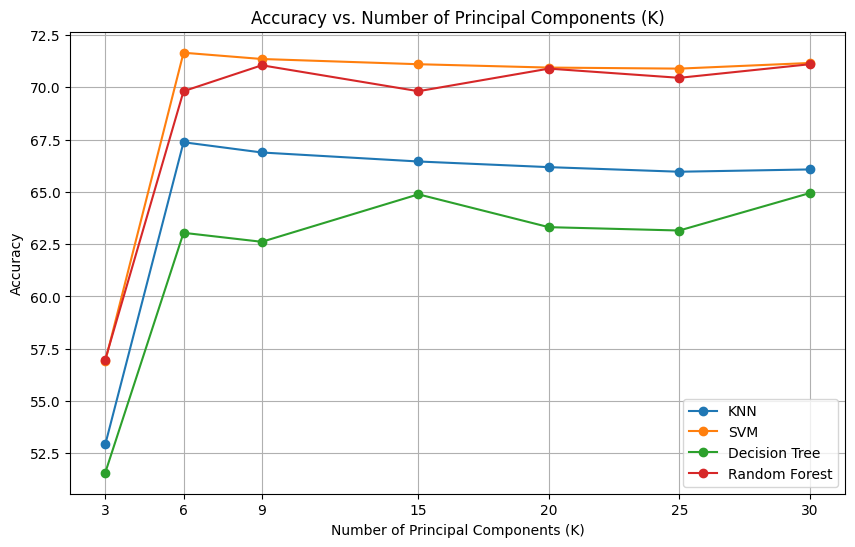

In [1]:
import matplotlib.pyplot as plt

# Accuracies for each model and K value (sorted in a list)
accuracies = {
    'KNN': [52.92, 67.37, 66.88, 66.45, 66.18, 65.96, 66.07],
    'SVM': [56.90, 71.65, 71.35, 71.10, 70.94, 70.89, 71.16],
    'Decision Tree': [51.57, 63.04, 62.61, 64.88, 63.31, 63.15, 64.94],
    'Random Forest': [56.98, 69.81, 71.05, 69.81, 70.89, 70.45, 71.10]
}

# K values
K_values = [3, 6, 9, 15, 20, 25, 30]

# Plotting the graph
plt.figure(figsize=(10, 6))

for model, accuracy in accuracies.items():
    plt.plot(K_values, accuracy, marker='o', label=model)

plt.title('Accuracy vs. Number of Principal Components (K)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()
